# Magnetic Models Comparison

In this tutorial, we'll compare various **Magnetic Models**.

## Setup

Let's import the necessary libraries:

In [1]:
import math

import numpy as np

%matplotlib widget
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

from ostk.physics.time import Scale
from ostk.physics.time import Instant
from ostk.physics.time import DateTime
from ostk.physics.environment.object.celestial import Earth
from ostk.physics.environment.magnetic import Earth as EarthMagneticModel

## Comparison

Let's set up some magnetic models:

In [2]:
magnetic_models = {
    EarthMagneticModel.Type.Dipole: None,
    EarthMagneticModel.Type.EMM2010: None,
    EarthMagneticModel.Type.EMM2015: None,
    EarthMagneticModel.Type.EMM2017: None,
    EarthMagneticModel.Type.IGRF11: None,
    EarthMagneticModel.Type.IGRF12: None,
    EarthMagneticModel.Type.WMM2010: None,
    EarthMagneticModel.Type.WMM2015: None,
}

In [3]:
earth = Earth.default()

In [4]:
def init_magnetic_models(magnetic_models):
    for key in magnetic_models:
        if magnetic_models[key] is None:
            magnetic_models[key] = EarthMagneticModel(key)


init_magnetic_models(magnetic_models)

In [5]:
instant = Instant.date_time(DateTime(2015, 1, 1, 0, 0, 0), Scale.UTC)

In [6]:
def calc_B_2d(magnetic_model, X, Z):
    size_x = len(X)
    size_z = len(X[0])

    size = size_x * size_z

    Bx = np.zeros(size)
    Bz = np.zeros(size)

    earth_radius_m = earth.get_equatorial_radius().in_meters()

    i = 0

    for x, z in np.vstack([X.ravel(), Z.ravel()]).T:
        if math.sqrt(pow(abs(x), 2) + pow(abs(z), 2)) < earth_radius_m:
            Bx[i] = 0.0
            Bz[i] = 0.0

        else:
            try:
                b = magnetic_model.get_field_value_at(np.array((x, 0.0, z)), instant).T

                bx = b[0]
                bz = b[2]

                Bx[i] = bx
                Bz[i] = bz

            except Exception as e:
                print(e)

                print("x = {}".format(x))
                print("z = {}".format(z))

                raise e

        i += 1

    return Bx.reshape(size_x, size_z), Bz.reshape(size_x, size_z)

In [7]:
def calc_B_3d(magnetic_model, X, Y, Z):
    size_x = len(X)
    size_y = len(X[0])
    size_z = len(X[0][0])

    size = size_x * size_y * size_z

    Bx = np.zeros(size)
    By = np.zeros(size)
    Bz = np.zeros(size)

    earth_radius_m = earth.get_equatorial_radius().in_meters()

    i = 0

    for x, y, z in np.vstack([X.ravel(), Y.ravel(), Z.ravel()]).T:
        if math.sqrt(pow(abs(x), 2) + pow(abs(y), 2) + pow(abs(z), 2)) < earth_radius_m:
            Bx[i] = 0.0
            By[i] = 0.0
            Bz[i] = 0.0

        else:
            try:
                b = magnetic_model.get_field_value_at(np.array((x, y, z)), instant).T

                bx = b[0]
                by = b[1]
                bz = b[2]

                Bx[i] = bx
                By[i] = by
                Bz[i] = bz

            except Exception as e:
                print(e)

                print("x = {}".format(x))
                print("y = {}".format(y))
                print("z = {}".format(z))

                raise e

        i += 1

    return (
        Bx.reshape(size_x, size_y, size_z),
        By.reshape(size_x, size_y, size_z),
        Bz.reshape(size_x, size_y, size_z),
    )

## Display

2D plot:

In [8]:
lim = 100000e3

xlim = (-lim, +lim)
zlim = (-lim, +lim)

(nx, nz) = 64, 64

x = np.linspace(xlim[0], xlim[1], nx)
z = np.linspace(zlim[0], zlim[1], nz)

(X, Z) = np.meshgrid(x, z)

(Bx, Bz) = calc_B_2d(magnetic_models[EarthMagneticModel.Type.EMM2015], X, Z)

/tmp/ipykernel_3907/1284092256.py:11: RuntimeWarning: divide by zero encountered in log
  color = 2 * np.log(np.hypot(Bx, Bz))


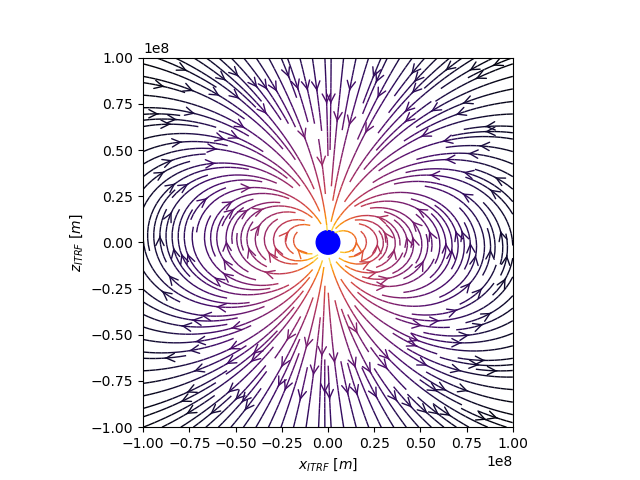

In [9]:
figure = plt.figure()

ax = figure.add_subplot(111)

# Plot Earth circle

ax.add_artist(Circle((0.0, 0.0), earth.get_equatorial_radius().in_meters(), color="b"))

# Plot B field

color = 2 * np.log(np.hypot(Bx, Bz))

ax.streamplot(
    x,
    z,
    Bx,
    Bz,
    color=color,
    linewidth=1,
    cmap=plt.cm.inferno,
    density=2,
    arrowstyle="->",
    arrowsize=1.5,
)

ax.set_xlabel("$x_{ITRF}\ [m]$")
ax.set_ylabel("$z_{ITRF}\ [m]$")
ax.set_xlim(xlim[0], xlim[1])
ax.set_ylim(zlim[0], zlim[1])
ax.set_aspect("equal")

plt.show()

3D plot:

In [10]:
lim = 10000e3

xlim = (-lim, +lim)
ylim = (-lim, +lim)
zlim = (-lim, +lim)

(nx, ny, nz) = (9, 9, 9)

x = np.linspace(xlim[0], xlim[1], nx)
y = np.linspace(ylim[0], ylim[1], ny)
z = np.linspace(zlim[0], zlim[1], nz)

(X, Y, Z) = np.meshgrid(x, y, z)

(Bx, By, Bz) = calc_B_3d(magnetic_models[EarthMagneticModel.Type.EMM2010], X, Y, Z)

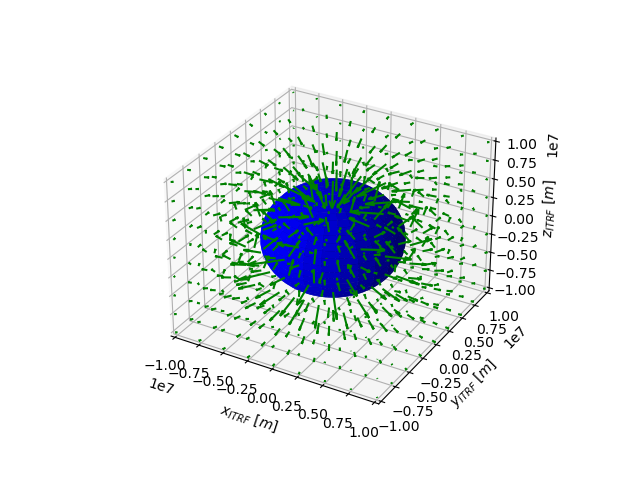

In [11]:
figure = plt.figure()

ax = figure.add_subplot(projection="3d")

# Plot Earth sphere

u = np.linspace(0.0, 2.0 * np.pi, 100)
v = np.linspace(0.0, np.pi, 100)

earth_radius_m = float(earth.get_equatorial_radius().in_meters())

x = earth_radius_m * np.outer(np.cos(u), np.sin(v))
y = earth_radius_m * np.outer(np.sin(u), np.sin(v))
z = earth_radius_m * np.outer(np.ones(np.size(u)), np.cos(v))

ax.plot_surface(x, y, z, rstride=4, cstride=4, color="b", linewidth=0, alpha=1)

# Plot B field

ax.quiver(X, Y, Z, Bx, By, Bz, length=1e11, color="g")

ax.set_xlabel("$x_{ITRF}\ [m]$")
ax.set_ylabel("$y_{ITRF}\ [m]$")
ax.set_zlabel("$z_{ITRF}\ [m]$")
ax.set_xlim(xlim[0], xlim[1])
ax.set_ylim(ylim[0], ylim[1])
ax.set_zlim(zlim[0], zlim[1])

plt.show()

---